<div style="text-align: center; font-weight: bold; font-size: 200%"> Boundaries handling </div><br />
<div style="text-align: center; font-weight: bold; font-size: 220%">DSMC</div><br />
<!--  <div style="text-align: center; font-size: 120%">Laboratoire de Physique des Plasmas - Ecole polytechnique</div><br /> -->
<div style="text-align: center; font-size: 150%"><img src="https://www.lpp.polytechnique.fr/IMG/logo_LPP.png" width="240" height="240" align="center"/></div>

## Problem to solve

<div style="text-align: center; font-size: 250%"><img src="resources/wall-collisions/problem.png" width="900" height="580" align="left"/></div>


Hypothesis : the boudary extremities are sorted such that $x_1 < x_2$ or if $x_1 = x_2$, then $y_1<y_2$.

### Plan : 

1. Find $t_i \geq 0$ such that $\vec{p}+t_i \vec{v}$ is on the straight line.
2. Check if it is on the segment. 

*Hypothesis* : the particle is a point (no radius).

#### Resolution
Take $\vec{p_t} = \vec{p}+t \vec{v}$ and $B' = \Big((a_x, a_y), (-a_y, a_x)\Big)$ (new coordinates system).

Rotation matrix : $P_{B'B} = R_{\theta}$ with $\theta = sgn(a_y) arccos(a_x)$. Then,  $\vec{p_t'} = R_{\theta} \vec{p_t}$.

$\Rightarrow $ the boundary is horizontal in the new base.

In the new base, there is a collision if $y_t' = y'_{wall}$ where $\vec{p_t'} = (x_t', y_t')$.

All calculations done, we find : $y_t' = -sin(\theta) (x+t v_x) + cos(\theta) (y+t v_y) = k_1 + t k_2$ with :
- $k_1 = - x \space sin(\theta)  + y \space cos(\theta)$
- $k_2 = - v_x \space  sin(\theta)+ v_y \space  cos(\theta)$

Finally : 
- If $k_2 \neq 0$, then : $t_i = \frac{y_{wall}'-k_1}{k_2}$.
- If $k_2 = 0$, there is obviously no solution if the particle is not already on the boundary.

So there is a collision only if $t_i \geq 0$.

We now need to verify that $\vec{p_{t_i}}$ is on the segment : $x_{t_i} \in [x_1, x_2]$.

## 2D-particle - disk a radius $r$.

Solve : $|y_t'- y_{wall}'| = r$

Which yields : $-r^2 + (k_1 -y'_{wall})^2 + 2 k_2 (k_1 -y'_{wall}) t_i + k_2^2 t_i^2 = 0$.

If $k_2 \neq 0$, $t_{i_{1,2}} = \frac{-(k_1 - y'_{wall}) \pm r}{k_2}$.

A necessary condition for the collision is $t_{i,1} + t_{i,2} \geq 0$.

Then verify that $p_{t_i}$ is on the boundary :
1. Same as before, special careness for the radius.
2. Comparing norm

<div style="text-align: center; font-size: 250%"><img src="resources/wall-collisions/disk_time_coll.JPG" width="600" height="400" align="left"/></div>


## Boundaries handling

Repeat previous calculations for each boundary (vectorized).

### Application to simulation

In general, you do not anticipate collisions, you wait for particles to leave the system and then you reflect them accordingly (once per time step).

One way to do that is to reverse each particle velocity, and do the previous algorithm.

<div style="text-align: center; font-size: 250%"><img src="resources/wall-collisions/polygon1.png" width="400" height="300" align="left"/></div>


### BONUS
What you get for each particle is a list of possible collision times. 

For a [polygonal system](https://www.geeksforgeeks.org/how-to-check-if-a-given-point-lies-inside-a-polygon/) :
1. if the number of possible collision times is even, then the particle is OUTSIDE.
2. Else, the particle is INSIDE.

One stone, two birds : check which particles are outside, and use the results ($t_i$ and $\vec{p_i}$) to reflect them. 

### Caution

- **Segments extremities** $\Rightarrow$ the problem is different
- The corner issue

### Conclusion
- Not the most efficient algorithm (computations for every particle) even though it is easily vectorized.
- Constraints on validity of the algorithm are higher as it is used for determining the inside / outside particle state.
- Should work fine for system with high boundaries collisions (fast particle in a narrow system e.g. the thruster grid).
- One stone, two birds.

 <div class="row">
      <div class="column">
    <img src="resources/wall-collisions/extremities-handling.JPG" align="left" style="width:40%">
  </div>
    <div class="column">
    <img src="resources/wall-collisions/corner.JPG"  align="left" style="width:35%">
    </div>
</div> 


In [1]:
%matplotlib notebook
# notebook # inline
from src.plotting import plot_boundaries, plot_particles
import matplotlib.pyplot as plt
from src.utils import handler_wall_collision, handler_wall_collision_point, make_collisions, make_collisions_vectorized, make_collisions_out_walls, deal_with_corner
import numpy as np

In [2]:
walls = 1.5*np.array([[0,0,1,0], [0,0,0,1], [1,0,1,1], [0,1,1,1]]) # bottom, left, right, top
a = np.array([[1,0, 1.5],[0,1, 1.5],[0,1, 1.5],[1,0, 1.5]])

# arr = np.array([[2,0.5,1,0,0], [0.5,1.7,0,1,0], [2,2,1,1,0], [1.2,0.5,1,0,0], [-0.2,0.5,-1,0,0]])  # np.random.random((N,5)) # 
arr = np.array([[2,1.7,1,1,0], [2,2,1,1,0]])
arr[:,2:] = 3*arr[:,2:]
color = [0.1,0.2] # ,0.3,0.4,0.5] # violet, dark blue, blue, green, yellow
radius = 0.2

idx_out_walls = [2]

<IPython.core.display.Javascript object>


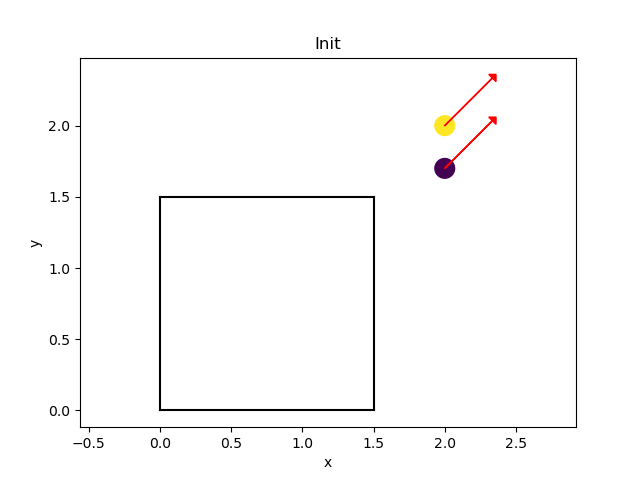

In [3]:
fig, ax = plt.subplots()
plot_boundaries(ax, walls)
plot_particles(ax, arr, r = 8, arrows = True, color= color)
ax.set_title('Init')
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y');

In [28]:
ct, cp = handler_wall_collision(arr, walls, a, radius)
ct_, cp_ = handler_wall_collision_point(arr, walls, a)
# deal_with_corner(ct_)

In [29]:
new_arr_1 = np.copy(arr)
new_arr_2 = np.copy(arr)
new_arr_3 = np.copy(arr)
make_collisions_vectorized(new_arr_1, a, ct, cp)
make_collisions_vectorized(new_arr_2, a, ct_, cp_)
indexes = make_collisions_out_walls(new_arr_3, a, ct, cp, idx_out_walls)
print(indexes[1])

[0 1]


<IPython.core.display.Javascript object>


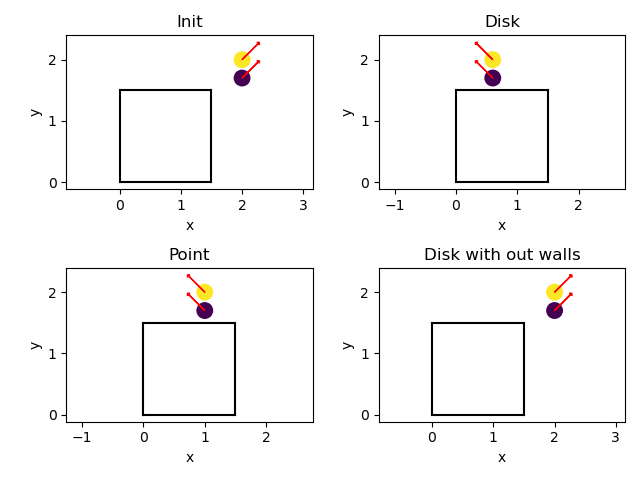

In [30]:
f = 50
s = f*np.pi*radius*radius

fig, ax = plt.subplots(2,2)

plot_boundaries(ax[0,0], walls)
plot_particles(ax[0,0], arr, r = s, arrows = True, color= color)

plot_boundaries(ax[0,1], walls)
plot_particles(ax[0,1], new_arr_1, r = s, arrows = True, color= color)

plot_boundaries(ax[1,0], walls)
plot_particles(ax[1,0], new_arr_2, r = s, arrows = True, color= color)

plot_boundaries(ax[1,1], walls)
plot_particles(ax[1,1], new_arr_3, r = s, arrows = True, color= color)

ax[0,0].set_title('Init')
ax[0,1].set_title('Disk')
ax[1,0].set_title('Point')
ax[1,1].set_title('Disk with out walls')

ax[0,0].axis('equal')
ax[0,1].axis('equal')
ax[1,0].axis('equal')
ax[1,1].axis('equal')

ax[0,0].set_xlabel('x')
ax[0,1].set_xlabel('x')
ax[1,0].set_xlabel('x')
ax[1,1].set_xlabel('x')

ax[0,0].set_ylabel('y')
ax[0,1].set_ylabel('y')
ax[1,0].set_ylabel('y')
ax[1,1].set_ylabel('y')

fig.tight_layout();

In [4]:
ct_, cp_ = handler_wall_collision_point(arr, walls, a)
new_arr_1 = np.copy(arr)
make_collisions_vectorized(new_arr_1, a, ct_, cp_)
new_arr_2 = np.copy(new_arr_1)
ct_, cp_ = handler_wall_collision_point(new_arr_1, walls, a)
make_collisions_vectorized(new_arr_2, a, ct_, cp_)

array([ True,  True])

<IPython.core.display.Javascript object>


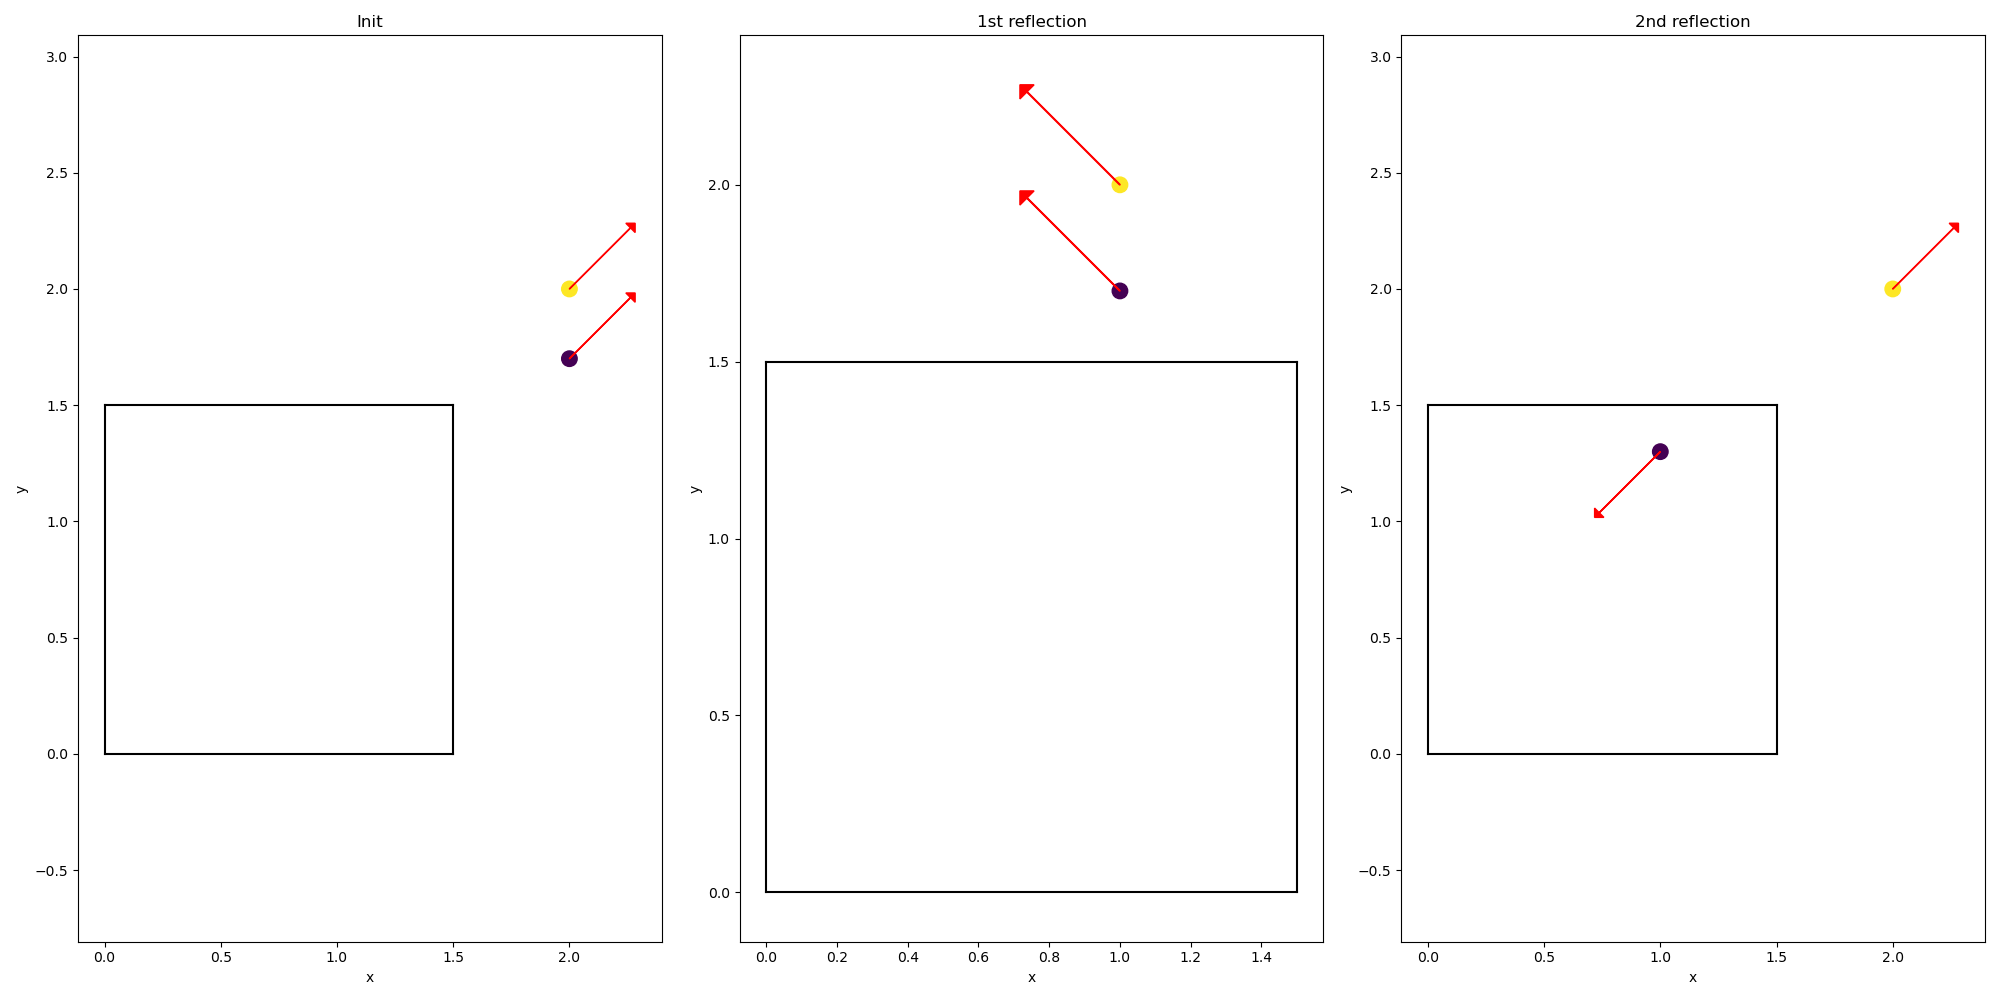

In [9]:
%matplotlib notebook
f = 50
s = f*np.pi*radius*radius

fig, ax = plt.subplots(1,3, figsize = (20,10), squeeze=False)

plot_boundaries(ax[0,0], walls)
plot_particles(ax[0,0], arr, r = s, arrows = True, color= color)

plot_boundaries(ax[0,1], walls)
plot_particles(ax[0,1], new_arr_1, r = s, arrows = True, color= color)

plot_boundaries(ax[0,2], walls)
plot_particles(ax[0,2], new_arr_2, r = s, arrows = True, color= color)

ax[0,0].set_title('Init')
ax[0,1].set_title('1st reflection')
ax[0,2].set_title('2nd reflection')

ax[0,0].axis('equal')
ax[0,1].axis('equal')
ax[0,2].axis('equal')

ax[0,0].set_xlabel('x')
ax[0,1].set_xlabel('x')
ax[0,2].set_xlabel('x')

ax[0,0].set_ylabel('y')
ax[0,1].set_ylabel('y')
ax[0,2].set_ylabel('y')

fig.tight_layout();

<IPython.core.display.Javascript object>


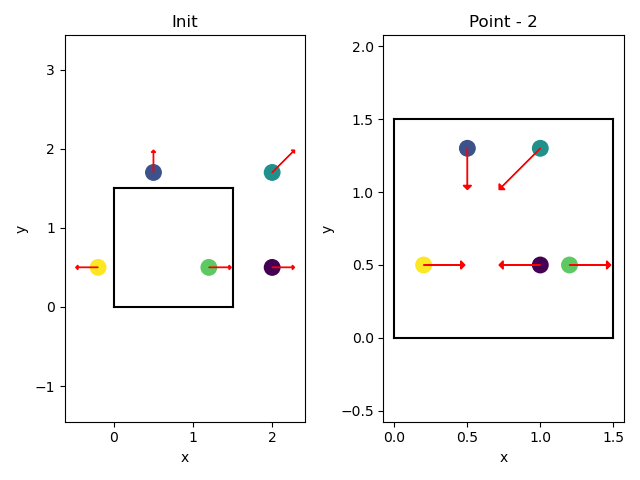

In [23]:
f = 50
s = f*np.pi*radius*radius

ct_, cp_ = handler_wall_collision_point(new_arr_2, walls, a)
deal_with_corner(ct_)
make_collisions_vectorized(new_arr_2, a, ct_, cp_)

fig, ax = plt.subplots(1,2)

plot_boundaries(ax[0], walls)
plot_particles(ax[0], arr, r = s, arrows = True, color= color)

plot_boundaries(ax[1], walls)
plot_particles(ax[1], new_arr_2, r = s, arrows = True, color= color)

ax[0].set_title('Init')
ax[1].set_title('Point - 2')

ax[0].axis('equal')
ax[1].axis('equal')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

ax[0].set_ylabel('y')
ax[1].set_ylabel('y')

fig.tight_layout();